# Where Independent variable are correlated among themselves we need to find those varianle and remove it, to get proper model fit and accurate accuracy

In [1]:
#importing the libraries
import pandas as pd
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:

df = pd.read_csv('wine_original.csv')

# first 5 rows of the data
df.head()

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline,target
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


In [3]:
df.shape

(178, 14)

In [4]:
df.isnull().sum()

Alcohol                         0
Malic acid                      0
Ash                             0
Alcalinity of ash               0
Magnesium                       0
Total phenols                   0
Flavanoids                      0
Nonflavanoid phenols            0
Proanthocyanins                 0
Color intensity                 0
Hue                             0
OD280/OD315 of diluted wines    0
Proline                         0
target                          0
dtype: int64

In [5]:
df[df.isnull().any(axis=1)]

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline,target


In [6]:
df.dtypes

Alcohol                         float64
Malic acid                      float64
Ash                             float64
Alcalinity of ash               float64
Magnesium                         int64
Total phenols                   float64
Flavanoids                      float64
Nonflavanoid phenols            float64
Proanthocyanins                 float64
Color intensity                 float64
Hue                             float64
OD280/OD315 of diluted wines    float64
Proline                           int64
target                            int64
dtype: object

In [8]:
df.dtypes.unique()

array([dtype('float64'), dtype('int64')], dtype=object)

In [9]:
num=['int64','float64']
num_var=list(df.select_dtypes(include=num))

In [10]:
num_var

['Alcohol',
 'Malic acid',
 'Ash',
 'Alcalinity of ash',
 'Magnesium',
 'Total phenols',
 'Flavanoids',
 'Nonflavanoid phenols',
 'Proanthocyanins',
 'Color intensity',
 'Hue',
 'OD280/OD315 of diluted wines',
 'Proline',
 'target']

In [12]:
df=df[num_var]
df.shape

(178, 14)

In [13]:
df.isna().sum()

Alcohol                         0
Malic acid                      0
Ash                             0
Alcalinity of ash               0
Magnesium                       0
Total phenols                   0
Flavanoids                      0
Nonflavanoid phenols            0
Proanthocyanins                 0
Color intensity                 0
Hue                             0
OD280/OD315 of diluted wines    0
Proline                         0
target                          0
dtype: int64

In [15]:
X=df.iloc[:,0:13]
y=df.iloc[:,-1]

In [16]:
X.head()

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [17]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [19]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=100)

from sklearn.ensemble import RandomForestClassifier

In [21]:
corrmatrix=X_train.corr()

In [22]:
corrmatrix

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
Alcohol,1.000000,0.062081,0.167437,-0.450532,0.374432,0.294151,0.245545,-0.202186,0.120713,0.572820,-0.028837,0.053960,0.692697
Malic acid,0.062081,1.000000,0.164968,0.245419,0.020534,-0.248874,-0.369138,0.300503,-0.119111,0.256771,-0.557874,-0.310018,-0.172564
Ash,0.167437,0.164968,1.000000,0.347224,0.385271,0.148928,0.167457,0.184253,0.017076,0.155186,0.006121,0.069172,0.267760
Alcalinity of ash,-0.450532,0.245419,0.347224,1.000000,-0.135867,-0.351095,-0.332488,0.387973,-0.245336,-0.197226,-0.150498,-0.191388,-0.481341
Magnesium,0.374432,0.020534,0.385271,-0.135867,1.000000,0.259628,0.216854,-0.116946,0.133031,0.317527,-0.019388,0.012151,0.468263
Total phenols,0.294151,-0.248874,0.148928,-0.351095,0.259628,1.000000,0.878938,-0.490745,0.602754,-0.023251,0.399488,0.653042,0.481731
Flavanoids,0.245545,-0.369138,0.167457,-0.332488,0.216854,0.878938,1.000000,-0.573437,0.670460,-0.128300,0.486133,0.756996,0.466718
Nonflavanoid phenols,-0.202186,0.300503,0.184253,0.387973,-0.116946,-0.490745,-0.573437,1.000000,-0.426517,0.134846,-0.263629,-0.540388,-0.293256
Proanthocyanins,0.120713,-0.119111,0.017076,-0.245336,0.133031,0.602754,0.670460,-0.426517,1.000000,-0.021835,0.217676,0.530959,0.322358
Color intensity,0.572820,0.256771,0.155186,-0.197226,0.317527,-0.023251,-0.128300,0.134846,-0.021835,1.000000,-0.458173,-0.417913,0.456151


<AxesSubplot:>

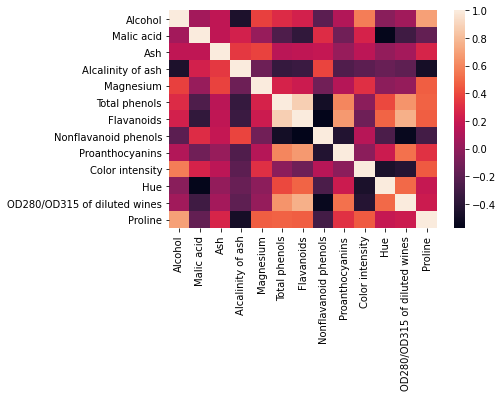

In [23]:
sns.heatmap(corrmatrix)

# Threshold =if two variable are having 70% correlation i want to discard that variable and choose the other variable is call threshold and work like that

In [25]:

def correlation(df,threshold):
    correlated_cols=set()
    corr_matrix=df.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j])>threshold:
                colname=corr_matrix.columns[i]
                correlated_cols.add(colname)
    return correlated_cols
    

In [35]:
correlation(X_train,0.7)

{'Flavanoids', 'OD280/OD315 of diluted wines'}

In [33]:
corr_matrix=df.corr()
for i in range(len(corr_matrix.columns)):
    print("i",i)
    for j in range(i):
        print("j::",j)
        if abs(corr_matrix.iloc[i,j])>0.7:
            colname=corr_matrix.columns[i]
            print("colname",colname)

i 0
i 1
j:: 0
i 2
j:: 0
j:: 1
i 3
j:: 0
j:: 1
j:: 2
i 4
j:: 0
j:: 1
j:: 2
j:: 3
i 5
j:: 0
j:: 1
j:: 2
j:: 3
j:: 4
i 6
j:: 0
j:: 1
j:: 2
j:: 3
j:: 4
j:: 5
colname Flavanoids
i 7
j:: 0
j:: 1
j:: 2
j:: 3
j:: 4
j:: 5
j:: 6
i 8
j:: 0
j:: 1
j:: 2
j:: 3
j:: 4
j:: 5
j:: 6
j:: 7
i 9
j:: 0
j:: 1
j:: 2
j:: 3
j:: 4
j:: 5
j:: 6
j:: 7
j:: 8
i 10
j:: 0
j:: 1
j:: 2
j:: 3
j:: 4
j:: 5
j:: 6
j:: 7
j:: 8
j:: 9
i 11
j:: 0
j:: 1
j:: 2
j:: 3
j:: 4
j:: 5
j:: 6
colname OD280/OD315 of diluted wines
j:: 7
j:: 8
j:: 9
j:: 10
i 12
j:: 0
j:: 1
j:: 2
j:: 3
j:: 4
j:: 5
j:: 6
j:: 7
j:: 8
j:: 9
j:: 10
j:: 11
i 13
j:: 0
j:: 1
j:: 2
j:: 3
j:: 4
j:: 5
colname target
j:: 6
colname target
j:: 7
j:: 8
j:: 9
j:: 10
j:: 11
colname target
j:: 12


# Drop the multiCollinearity Column use it for model fit